In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


pd.set_option('display.max_rows', 500000)
pd.set_option('display.max_columns', 500000)

This pizza sales dataset make up 12 relevant features:

order_id: Unique identifier for each order placed by a table

order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)

pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price

quantity: Quantity ordered for each pizza of the same type and size

order_date: Date the order was placed (entered into the system prior to cooking & serving)

order_time: Time the order was placed (entered into the system prior to cooking & serving)

unit_price: Price of the pizza in USD

total_price: unit_price * quantity

pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)

pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price

pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not 

specified; and they all include Tomato Sauce, unless another sauce is specified)

pizza_name: Name of the pizza as shown in the menu

# Enetendendo dataset

In [2]:
dados = pd.read_excel('Data Model - Pizza Sales.xlsx')

In [3]:
dados.shape

(48620, 12)

In [4]:
dados.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


# Analisando pizzas e seus tipos 

#### Pizzas nomes

In [6]:
dados['pizza_name'].unique()

array(['The Hawaiian Pizza', 'The Classic Deluxe Pizza',
       'The Five Cheese Pizza', 'The Italian Supreme Pizza',
       'The Mexicana Pizza', 'The Thai Chicken Pizza',
       'The Prosciutto and Arugula Pizza', 'The Barbecue Chicken Pizza',
       'The Greek Pizza', 'The Spinach Supreme Pizza',
       'The Green Garden Pizza', 'The Italian Capocollo Pizza',
       'The Spicy Italian Pizza', 'The Spinach Pesto Pizza',
       'The Vegetables + Vegetables Pizza', 'The Southwest Chicken Pizza',
       'The California Chicken Pizza', 'The Pepperoni Pizza',
       'The Chicken Pesto Pizza', 'The Big Meat Pizza',
       'The Soppressata Pizza', 'The Four Cheese Pizza',
       'The Napolitana Pizza', 'The Calabrese Pizza',
       'The Italian Vegetables Pizza', 'The Mediterranean Pizza',
       'The Pepper Salami Pizza', 'The Spinach and Feta Pizza',
       'The Sicilian Pizza', 'The Chicken Alfredo Pizza',
       'The Pepperoni, Mushroom, and Peppers Pizza',
       'The Brie Carre Pizza'

In [7]:
dados['pizza_name'].unique().shape[0]

32

In [8]:
dados['pizza_name'].value_counts()

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

In [9]:
seleção = ['The Classic Deluxe Pizza',
'The Barbecue Chicken Pizza',                  
'The Hawaiian Pizza',                           
'The Pepperoni Pizza',                         
'The Thai Chicken Pizza',                        
'The California Chicken Pizza',                  
'The Sicilian Pizza',                           
'The Spicy Italian Pizza',                     
'The Southwest Chicken Pizza',                   
'The Four Cheese Pizza',                         
'The Italian Supreme Pizza',                     
'The Big Meat Pizza',                            
'The Vegetables + Vegetables Pizza',             
'The Mexicana Pizza',                            
'The Napolitana Pizza',                          
'The Spinach and Feta Pizza']

seleção2  = ['The Prosciutto and Arugula Pizza',
'The Pepper Salami Pizza',                   
'The Italian Capocollo Pizza',                 
'The Greek Pizza',                               
'The Five Cheese Pizza',                      
'The Pepperoni, Mushroom, and Peppers Pizza',    
'The Green Garden Pizza',                         
'The Chicken Alfredo Pizza',                     
'The Italian Vegetables Pizza',                   
'The Chicken Pesto Pizza',                       
'The Spinach Pesto Pizza',                        
'The Soppressata Pizza',                          
'The Spinach Supreme Pizza',                      
'The Calabrese Pizza',                          
'The Mediterranean Pizza',                        
'The Brie Carre Pizza']

In [10]:
dados['pizza_name'].isin(seleção)
pizzanamemeio = dados[dados['pizza_name'].isin(seleção)]
pizzanamemeio2 = dados[dados['pizza_name'].isin(seleção2)]

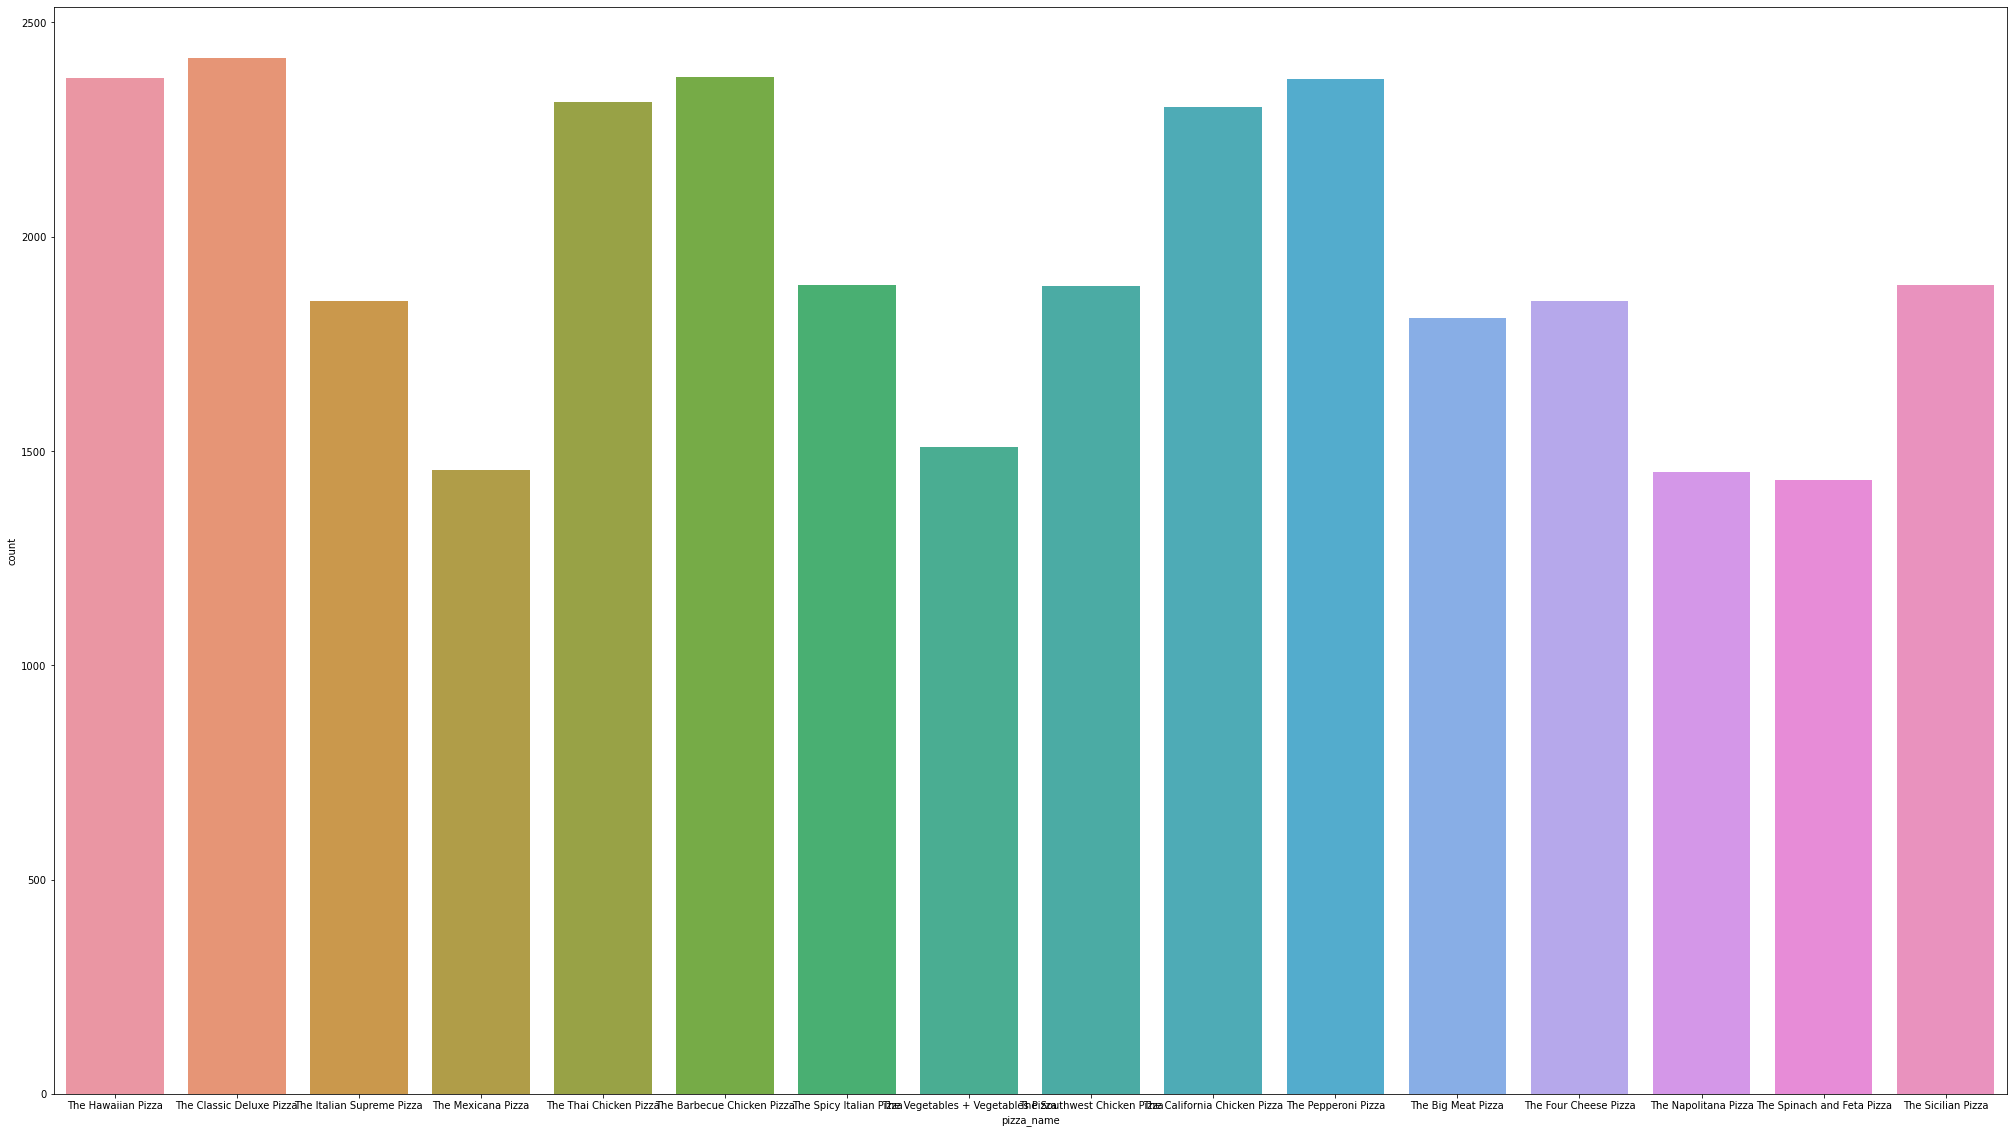

In [11]:
barplotnamehalf1= sns.countplot(x = 'pizza_name', data = pizzanamemeio) 
barplotnamehalf1.figure.set_size_inches(35,20)

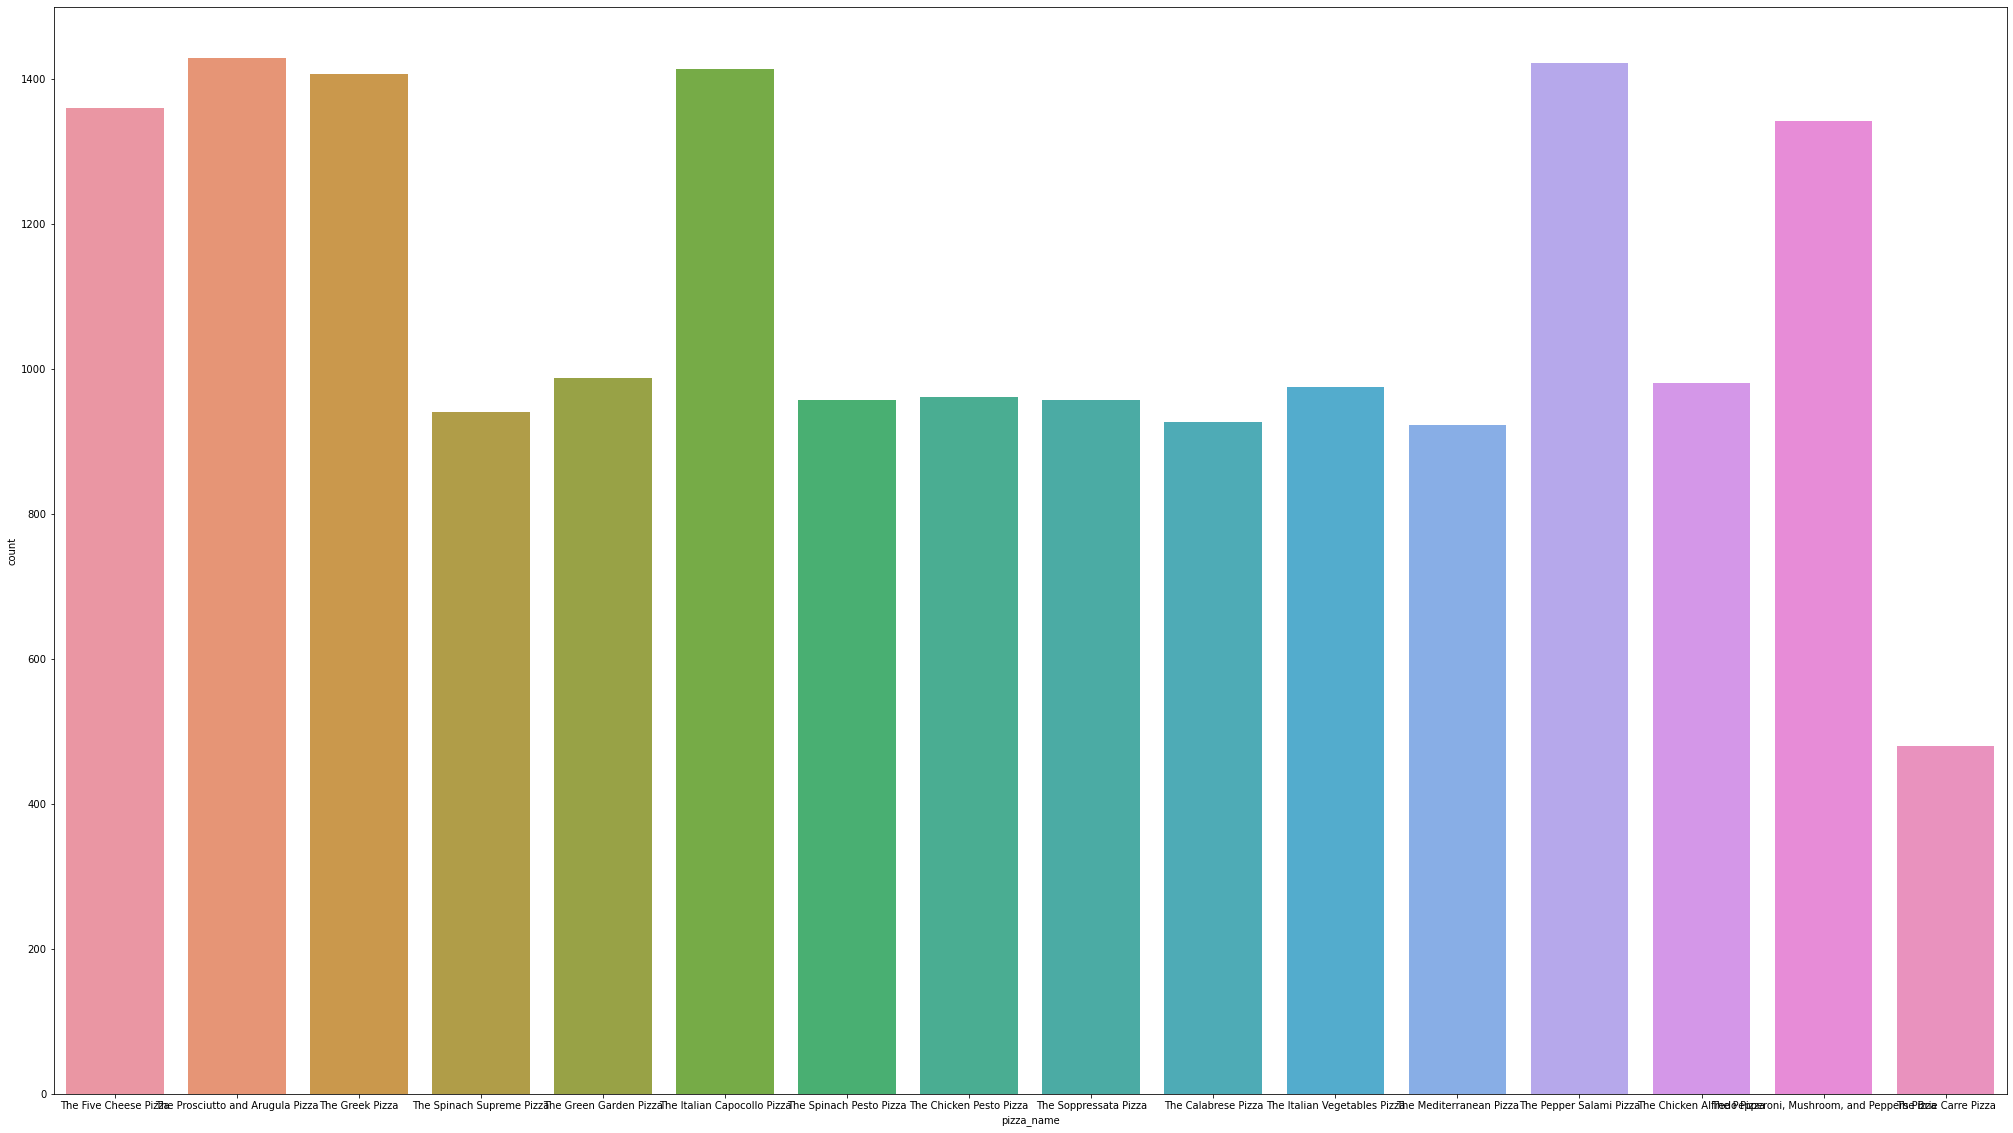

In [12]:
barplotnamehalf2 = sns.countplot(x = 'pizza_name', data = pizzanamemeio2) 
barplotnamehalf2.figure.set_size_inches(35,20)

#### Pizzas categorias

In [13]:
dados['pizza_category'].unique()

array(['Classic', 'Veggie', 'Supreme', 'Chicken'], dtype=object)

In [14]:
dados['pizza_category'].unique().shape[0]

4

In [15]:
classics = dados[dados['pizza_category'] == 'Classic']
classics['pizza_name'].value_counts()

The Classic Deluxe Pizza                      2416
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Big Meat Pizza                            1811
The Napolitana Pizza                          1451
The Italian Capocollo Pizza                   1414
The Greek Pizza                               1406
The Pepperoni, Mushroom, and Peppers Pizza    1342
Name: pizza_name, dtype: int64

In [16]:
#Cruzando nomes e categorias

In [17]:
pd.crosstab(dados['pizza_name'],dados['pizza_category'])


pizza_category,Chicken,Classic,Supreme,Veggie
pizza_name,,,,
The Barbecue Chicken Pizza,2372,0,0,0
The Big Meat Pizza,0,1811,0,0
The Brie Carre Pizza,0,0,480,0
The Calabrese Pizza,0,0,927,0
The California Chicken Pizza,2302,0,0,0
The Chicken Alfredo Pizza,980,0,0,0
The Chicken Pesto Pizza,961,0,0,0
The Classic Deluxe Pizza,0,2416,0,0
The Five Cheese Pizza,0,0,0,1359


In [18]:
maisvendidas = pd.crosstab(dados['pizza_category'],dados['pizza_name'])
maisvendidas.max().sort_values(ascending = False)

pizza_name
The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza     

In [19]:
dados['pizza_name'].value_counts()

The Classic Deluxe Pizza                      2416
The Barbecue Chicken Pizza                    2372
The Hawaiian Pizza                            2370
The Pepperoni Pizza                           2369
The Thai Chicken Pizza                        2315
The California Chicken Pizza                  2302
The Spicy Italian Pizza                       1887
The Sicilian Pizza                            1887
The Southwest Chicken Pizza                   1885
The Four Cheese Pizza                         1850
The Italian Supreme Pizza                     1849
The Big Meat Pizza                            1811
The Vegetables + Vegetables Pizza             1510
The Mexicana Pizza                            1456
The Napolitana Pizza                          1451
The Spinach and Feta Pizza                    1432
The Prosciutto and Arugula Pizza              1428
The Pepper Salami Pizza                       1422
The Italian Capocollo Pizza                   1414
The Greek Pizza                

Conferir top 5 pizzas mais vendidas

The Classic Deluxe Pizza                      
The Barbecue Chicken Pizza                    
The Hawaiian Pizza                            
The Pepperoni Pizza                          
The Thai Chicken Pizza                      
The California Chicken Pizza                  

In [20]:
pd.crosstab(dados['pizza_name'],[dados['pizza_category'], dados['pizza_size']],)

pizza_category                             Chicken           Classic        \
pizza_size                                       L    M    S       L     M   
pizza_name                                                                   
The Barbecue Chicken Pizza                     967  926  479       0     0   
The Big Meat Pizza                               0    0    0       0     0   
The Brie Carre Pizza                             0    0    0       0     0   
The Calabrese Pizza                              0    0    0       0     0   
The California Chicken Pizza                   895  914  493       0     0   
The Chicken Alfredo Pizza                      187  697   96       0     0   
The Chicken Pesto Pizza                        392  274  295       0     0   
The Classic Deluxe Pizza                         0    0    0     471  1159   
The Five Cheese Pizza                            0    0    0       0     0   
The Four Cheese Pizza                            0    0    0       0     0   
The Greek Pizza                                  0    0    0     255   279   
The Green Garden Pizza                           0    0    0       0     0   
The Hawaiian Pizza                               0    0    0     896   473   
The Italian Capocollo Pizza                      0    0    0     715   399   
The Italian Supreme Pizza                        0    0    0       0     0   
The Italian Vegetables Pizza                     0    0    0       0     0   
The Mediterranean Pizza                          0    0    0       0     0   
The Mexicana Pizza                               0    0    0       0     0   
The Napolitana Pizza                             0    0    0     557   426   
The Pepper Salami Pizza                          0    0    0       0     0   
The Pepperoni Pizza                              0    0    0     712   918   
The Pepperoni, Mushroom, and Peppers Pizza       0    0    0     381   391   
The Prosciutto and Arugula Pizza                 0    0    0       0     0   
The Sicilian Pizza                               0    0    0       0     0   
The Soppressata Pizza                            0    0    0       0     0   
The Southwest Chicken Pizza                    993  526  366       0     0   
The Spicy Italian Pizza                          0    0    0       0     0   
The Spinach Pesto Pizza                          0    0    0       0     0   
The Spinach Supreme Pizza                        0    0    0       0     0   
The Spinach and Feta Pizza                       0    0    0       0     0   
The Thai Chicken Pizza                        1365  474  476       0     0   
The Vegetables + Vegetables Pizza                0    0    0       0     0   

pizza_category                                            Supreme            \
pizza_size                                     S   XL XXL       L    M    S   
pizza_name                                                                    
The Barbecue Chicken Pizza                     0    0   0       0    0    0   
The Big Meat Pizza                          1811    0   0       0    0    0   
The Brie Carre Pizza                           0    0   0       0    0  480   
The Calabrese Pizza                            0    0   0     274  554   99   
The California Chicken Pizza                   0    0   0       0    0    0   
The Chicken Alfredo Pizza                      0    0   0       0    0    0   
The Chicken Pesto Pizza                        0    0   0       0    0    0   
The Classic Deluxe Pizza                     786    0   0       0    0    0   
The Five Cheese Pizza                          0    0   0       0    0    0   
The Four Cheese Pizza                          0    0   0       0    0    0   
The Greek Pizza                              300  544  28       0    0    0   
The Green Garden Pizza                         0    0   0       0    0    0   
The Hawaiian Pizza                          1001    0   0       0    0    0   
The I

In [21]:
# Dentre as top 6 pizzas mais vendidas 3 são classic e 3 são chiken

#### Pizzas ingredientes

In [22]:
dados['pizza_ingredients'].unique()



array(['Sliced Ham, Pineapple, Mozzarella Cheese',
       'Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon',
       'Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic',
       'Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic',
       'Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic',
       'Chicken, Pineapple, Tomatoes, Red Peppers, Thai Sweet Chilli Sauce',
       'Prosciutto di San Daniele, Arugula, Mozzarella Cheese',
       'Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce',
       'Kalamata Olives, Feta Cheese, Tomatoes, Garlic, Beef Chuck Roast, Red Onions',
       'Spinach, Red Onions, Pepperoni, Tomatoes, Artichokes, Kalamata Olives, Garlic, Asiago Cheese',
       'Spinach, Mushrooms, Tomatoes, Green Olives, Feta Cheese',
       'Capocollo, Red Peppers, Tomatoes, Goat Cheese, Garlic, Oregano',
       'Capocollo, Tomatoes, Goat C

In [23]:
dados['pizza_ingredients'].unique().shape[0]

32

In [24]:
dados[dados['pizza_ingredients'] == 'Sliced Ham, Pineapple, Mozzarella Cheese']
#ingredientes são composto por 3 itens mas não é uma tupla , é so uma string

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
93,94,38,hawaiian_s,1,2015-01-01,17:03:00,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
109,110,45,hawaiian_s,1,2015-01-01,17:55:48,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
124,125,52,hawaiian_l,1,2015-01-01,18:53:02,16.50,16.50,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
174,175,76,hawaiian_l,1,2015-01-02,12:21:17,16.50,16.50,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48430,48431,21267,hawaiian_s,2,2015-12-30,17:41:53,10.50,21.00,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
48456,48457,21283,hawaiian_l,1,2015-12-31,12:14:54,16.50,16.50,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
48518,48519,21304,hawaiian_s,1,2015-12-31,16:30:41,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
48523,48524,21306,hawaiian_s,1,2015-12-31,16:31:27,10.50,10.50,S,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza


#### Pizzas tamanho

In [25]:
dados['pizza_size'].unique()

array(['M', 'L', 'S', 'XL', 'XXL'], dtype=object)

In [26]:
dados['pizza_size'].unique().shape[0]

5

In [27]:
seleção = ['XXL','XL']

In [28]:
dados['pizza_size'].isin(seleção)
dados[dados['pizza_size'].isin(seleção)]['pizza_category'].value_counts()

Classic    572
Name: pizza_category, dtype: int64

In [29]:
# XXL E XL são presentes apenas em pizzas de categoria classic

## Cruzando as informações tamanho e nome 

In [30]:
infocross1  =pd.crosstab(dados['pizza_name'], [dados['pizza_size'], dados['pizza_category']],aggfunc = 'mean', values =  dados['unit_price'])

In [31]:
pizzasvendas = pd.DataFrame(dados['pizza_name'].value_counts())
pizzasvendas  = pizzasvendas.reset_index()
pizzasvendas = pizzasvendas.rename({'index':'Pizza nome','pizza_name':'Numero de vendas'}, axis =1)


In [32]:
infocross2 = pd.crosstab(dados['pizza_name'],dados['pizza_category'])
infocross2

pizza_category,Chicken,Classic,Supreme,Veggie
pizza_name,,,,
The Barbecue Chicken Pizza,2372,0,0,0
The Big Meat Pizza,0,1811,0,0
The Brie Carre Pizza,0,0,480,0
The Calabrese Pizza,0,0,927,0
The California Chicken Pizza,2302,0,0,0
The Chicken Alfredo Pizza,980,0,0,0
The Chicken Pesto Pizza,961,0,0,0
The Classic Deluxe Pizza,0,2416,0,0
The Five Cheese Pizza,0,0,0,1359


In [33]:
MEDc = infocross2['Chicken'].mean()
MEDcl = infocross2['Classic'].mean()
MEDs = infocross2['Supreme'].mean()
MEDv = infocross2['Veggie'].mean()

MEDc 

337.96875

In [34]:
RANK =  pd.DataFrame({'Media':[MEDc,MEDcl,MEDs,MEDv]}, index = ['CK','CL','S','V'])
RANK = RANK.sort_values(by = 'Media' , ascending = False)
RANK

,Media
CL,455.59375
S,368.03125
V,357.78125
CK,337.96875


In [35]:
pd.DataFrame(dados['pizza_category'].value_counts())


,pizza_category
Classic,14579
Supreme,11777
Veggie,11449
Chicken,10815


In [36]:
dados

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [37]:
preçoseqntd = pd.crosstab(dados['unit_price'], dados['pizza_name'])
preçoseqntd2 = pd.crosstab([dados['unit_price'],dados['pizza_size']], dados['pizza_name'])

In [38]:
preçoseqntd

pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
unit_price,,,,,,,,,,,,,,,,,,,,,
9.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10.50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12.00,0,1811,0,0,0,0,0,786,0,0,...,0,0,0,0,0,0,0,437,0,457
12.25,0,0,0,99,0,0,0,0,0,0,...,0,731,0,0,0,0,0,0,0,0
12.50,0,0,0,0,0,0,0,0,0,0,...,420,0,288,0,399,397,394,0,0,0
12.75,479,0,0,0,493,96,295,0,0,0,...,0,0,0,366,0,0,0,0,476,0
13.25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14.50,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#Calculando Lucro 

In [40]:
preçoseqntd.index * preçoseqntd['The Barbecue Chicken Pizza']

unit_price
9.75         0.00
10.50        0.00
11.00        0.00
12.00        0.00
12.25        0.00
12.50        0.00
12.75     6107.25
13.25        0.00
14.50        0.00
14.75        0.00
15.25        0.00
16.00        0.00
16.25        0.00
16.50        0.00
16.75    15510.50
17.50        0.00
17.95        0.00
18.50        0.00
20.25        0.00
20.50        0.00
20.75    20065.25
21.00        0.00
23.65        0.00
25.50        0.00
35.95        0.00
dtype: float64

In [41]:
lucrospizzas = pd.crosstab(dados['pizza_size'], dados['pizza_name'],aggfunc = 'sum', values = dados['unit_price'])
lucrospizzas


pizza_name,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
pizza_size,,,,,,,,,,,,,,,,,,,,,
L,20065.25,NaN,NaN,5548.50,18571.25,3880.25,8134.00,9655.5,25141.5,22850.35,...,8777.25,12069.00,8320.75,20604.75,22576.0,5789.25,5810.0,8849.25,28323.75,8565.75
M,15510.50,NaN,NaN,9002.50,15309.50,11674.75,4589.50,18544.0,NaN,8510.75,...,9652.50,9100.00,4422.00,8810.50,6600.0,4636.50,4389.0,8928.00,7939.50,10080.00
S,6107.25,21732.0,11352.0,1212.75,6285.75,1224.00,3761.25,9432.0,NaN,NaN,...,5250.00,8954.75,3600.00,4666.50,4987.5,4962.50,4925.0,5244.00,6069.00,5484.00
XL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XXL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
lucrospizzas2 = lucrospizzas.max().sort_values(ascending = False)
lucrospizzas2 

pizza_name
The Thai Chicken Pizza                        28323.75
The Five Cheese Pizza                         25141.50
The Four Cheese Pizza                         22850.35
The Spicy Italian Pizza                       22576.00
The Big Meat Pizza                            21732.00
The Southwest Chicken Pizza                   20604.75
The Barbecue Chicken Pizza                    20065.25
The California Chicken Pizza                  18571.25
The Classic Deluxe Pizza                      18544.00
The Mexicana Pizza                            17091.00
The Italian Supreme Pizza                     15251.25
The Hawaiian Pizza                            14784.00
The Italian Capocollo Pizza                   14657.50
The Pepper Salami Pizza                       14110.00
The Greek Pizza                               13872.00
The Sicilian Pizza                            12069.00
The Chicken Alfredo Pizza                     11674.75
The Pepperoni Pizza                           11475.00

In [43]:
lucrospizzasDF = pd.DataFrame(lucrospizzas.max().sort_values(ascending = False))
lucrospizzasDF

,0
pizza_name,
The Thai Chicken Pizza,28323.75
The Five Cheese Pizza,25141.50
The Four Cheese Pizza,22850.35
The Spicy Italian Pizza,22576.00
The Big Meat Pizza,21732.00
The Southwest Chicken Pizza,20604.75
The Barbecue Chicken Pizza,20065.25
The California Chicken Pizza,18571.25
The Classic Deluxe Pizza,18544.00


In [44]:
# lista das pizzas em ordem das mais lucrativas


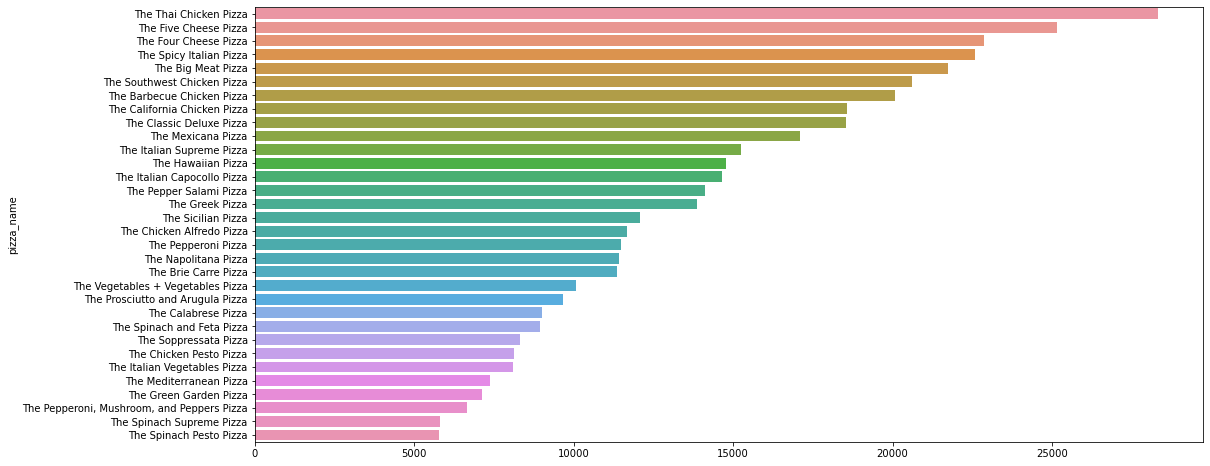

In [45]:

graficolucro1 = sns.barplot( x = lucrospizzas2.values,y = lucrospizzas2.index)
graficolucro1.figure.set_size_inches(17,8)

In [46]:
round(dados['total_price'].mean(),2)

16.82

In [47]:
# Valor medio dos pedidos

# Analisando outros fatores

TOP 6 Pizzas mais vendidas

1-The Classic Deluxe Pizza

2-The Barbecue Chicken Pizza

3-The Hawaiian Pizza

4-The Pepperoni Pizza

5-The Thai Chicken Pizza

6-The California Chicken Pizza


TOP 6 Pizzas menos vendidas:

1-The Soppressata Pizza  

2-The Spinach Pesto Pizza  

3-The Spinach Supreme Pizza

4-The Calabrese Pizza 

5-The Mediterranean Pizza

6-The Brie Carre Pizza     

TOP 7 Pizzas que dão mais lucro :

1-The Thai Chicken Pizza

2-The Five Cheese Pizza

3-The Four Cheese Pizza

4-The Spicy Italian Pizza

5-The Big Meat Pizza

6-The Southwest Chicken Pizza

7-The Barbecue Chicken Pizza


In [48]:
dados

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [49]:
dados['quantity'].value_counts()

1    47693
2      903
3       21
4        3
Name: quantity, dtype: int64

In [50]:
#NORMALMENTE AS PESSOAS PEDEM 1 PIZZA SÓ

In [51]:
dados['order_date'].value_counts()

2015-11-26    261
2015-11-27    259
2015-10-15    258
2015-07-04    233
2015-07-03    207
             ... 
2015-12-27     87
2015-11-22     82
2015-12-29     77
2015-03-22     76
2015-12-30     73
Name: order_date, Length: 358, dtype: int64

In [52]:
#DIA 26 DE NOVEMBRO MUITAS PESSOAS COMPRARAM. PQ ?
#NENHUM FERIADO DIA 26

In [53]:
dados['order_time'].mode()

0    12:32:00
dtype: object

In [54]:
dados['order_time'].unique()

array([datetime.time(11, 38, 36), datetime.time(11, 57, 40),
       datetime.time(12, 12, 28), ..., datetime.time(20, 51, 7),
       datetime.time(21, 14, 37), datetime.time(22, 9, 54)], dtype=object)

In [55]:
pd.DataFrame(dados['order_time'].value_counts()).head(50)

,order_time
12:32:00,26
11:59:10,24
12:52:36,23
12:53:29,23
12:26:04,23
11:57:15,21
12:25:12,21
13:31:27,21
11:50:01,21
13:04:13,20


In [56]:
# Entre 12:00 e 13:00 são os horarios de pico

## Enconding data e hora

In [57]:
from datetime import datetime
import datetime

In [58]:
dados.head(200)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,83,southw_ckn_s,1,2015-01-02,12:53:27,12.75,12.75,S,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja...",The Southwest Chicken Pizza
196,197,84,pepperoni_l,1,2015-01-02,13:13:41,15.25,15.25,L,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza
197,198,85,classic_dlx_m,1,2015-01-02,13:34:49,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
198,199,85,classic_dlx_s,1,2015-01-02,13:34:49,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [59]:

dados['Month'] = dados['order_date'].dt.month
dados['Day of week'] =dados['order_date'].dt.dayofweek

In [60]:
days = {0:'Mon',1:'Tue',2:'Wen',3:'Thur',4:'Fri',5:'Sat',6:'Mon'}

dados

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,3
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,3
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,3
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,3
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,12,3
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,12,3
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,12,3
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,12,3


In [61]:

dados['Day of week'] = dados['Day of week'].map(days)
dados 


,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,1,Thur
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,1,Thur
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,1,Thur
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,1,Thur
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,1,Thur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,12,Thur
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,12,Thur
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,12,Thur
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,12,Thur


In [62]:
months={1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'Novemenber',12:'December'}

In [63]:
dados['Month'] =dados['Month'].map(months)
dados

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,Thur
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,January,Thur
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,Thur
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,January,Thur
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,January,Thur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,December,Thur
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,December,Thur
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,December,Thur
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,December,Thur


In [64]:
dados['Day of week'].value_counts()

Mon     12286
Fri      8106
Sat      7355
Thur     7323
Wen      6797
Tue      6753
Name: Day of week, dtype: int64

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Day of week', ylabel='count'>

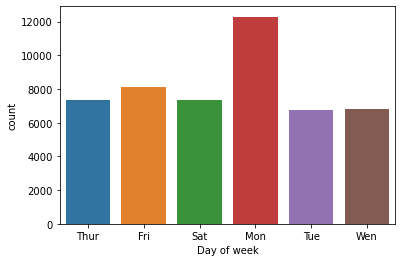

In [65]:
sns.countplot(dados['Day of week'])

## Quanto são os pedidos nos nossos horarios de pico

In [66]:
dadosnotime = (dados['order_time'] >= datetime.time(11, 00, 00 )) & (dados['order_time'] <= datetime.time(14, 00, 00 ))
dadosHdepico = dados[dadosnotime]
dadosHdepico

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,Thur
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,January,Thur
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,Thur
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,January,Thur
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,January,Thur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48477,48478,21290,ckn_pesto_l,1,2015-12-31,13:16:45,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",The Chicken Pesto Pizza,December,Thur
48478,48479,21290,ital_veggie_l,1,2015-12-31,13:16:45,21.00,21.00,L,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,December,Thur
48479,48480,21291,green_garden_s,1,2015-12-31,13:29:39,12.00,12.00,S,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza,December,Thur
48480,48481,21292,classic_dlx_s,1,2015-12-31,13:34:19,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,December,Thur


In [67]:
dadosHdepico1Jan  = dadosHdepico['order_date'] == '2015-01-01T00:00:00.000000000'

In [68]:
dadosHdepico

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,Thur
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,January,Thur
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,Thur
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,January,Thur
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,January,Thur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48477,48478,21290,ckn_pesto_l,1,2015-12-31,13:16:45,20.75,20.75,L,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli...",The Chicken Pesto Pizza,December,Thur
48478,48479,21290,ital_veggie_l,1,2015-12-31,13:16:45,21.00,21.00,L,Veggie,"Eggplant, Artichokes, Tomatoes, Zucchini, Red ...",The Italian Vegetables Pizza,December,Thur
48479,48480,21291,green_garden_s,1,2015-12-31,13:29:39,12.00,12.00,S,Veggie,"Spinach, Mushrooms, Tomatoes, Green Olives, Fe...",The Green Garden Pizza,December,Thur
48480,48481,21292,classic_dlx_s,1,2015-12-31,13:34:19,12.00,12.00,S,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,December,Thur


In [69]:
quantidadefinalHdepico = pd.crosstab(dadosHdepico['Day of week'],dadosHdepico['order_date'],aggfunc  ='sum', values =dados['quantity']).max()
quantidadefinalHdepico

order_date
2015-01-01    56.0
2015-01-02    43.0
2015-01-03    35.0
2015-01-04    27.0
2015-01-05    26.0
              ... 
2015-12-27    19.0
2015-12-28    42.0
2015-12-29    42.0
2015-12-30    46.0
2015-12-31    37.0
Length: 358, dtype: float64

In [70]:
dadosHdepico[dadosHdepico1Jan]['quantity'].sum()

56

In [71]:
# Quantidade de pizzas feitasno horario de pico  por dia registrado 

In [72]:
quantidadefinalHdepico.mean()

44.48324022346369

In [73]:
# Media da quantidade de pizzas durante o horario de pico

# Analise focada nas pizzas mais lucrativas

### The Thai Chicken Pizza

In [74]:
TTC = dados[dados['pizza_name'] == 'The Thai Chicken Pizza']
TTC['pizza_size'].value_counts()

L    1365
S     476
M     474
Name: pizza_size, dtype: int64

In [75]:
sns.set_palette('pastel')

C:\Users\Pichau\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


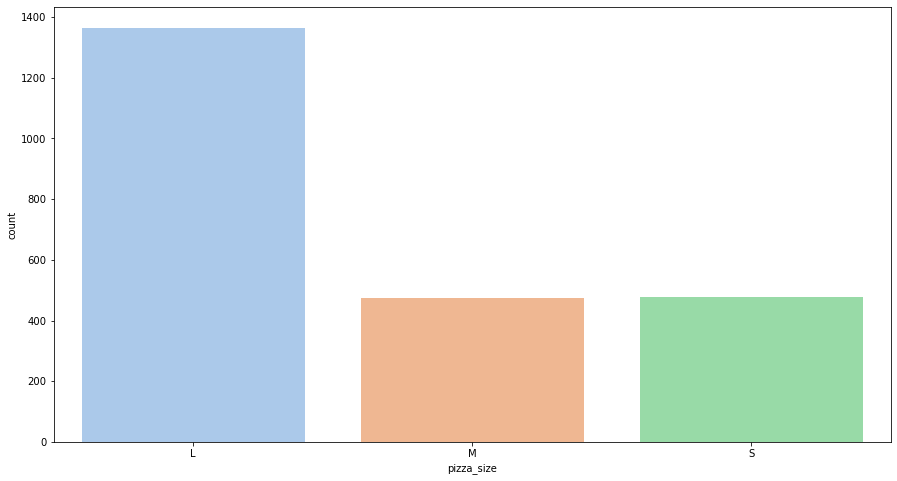

In [76]:
grafsizettc = sns.countplot(TTC['pizza_size'])
grafsizettc.figure.set_size_inches(15,8)

In [77]:
TTC['Day of week'].value_counts()

Mon     595
Fri     378
Sat     363
Thur    337
Wen     324
Tue     318
Name: Day of week, dtype: int64

In [78]:
TTC['Month'].value_counts()

July          213
March         210
Novemenber    202
December      201
September     199
January       197
April         194
May           189
October       186
June          181
August        179
February      164
Name: Month, dtype: int64

In [79]:
#Provavelmente dia 26 teve alguma promoção

# Criando modelo preditivo usando Decison Tree

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [82]:
from sklearn import metrics

In [83]:
dados.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,Thur
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,January,Thur
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,Thur
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,January,Thur
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,January,Thur


In [84]:
dados.corr()

,order_details_id,order_id,quantity,unit_price,total_price
order_details_id,1.000000,0.999990,0.003639,-0.003286,-0.000847
order_id,0.999990,1.000000,0.003621,-0.003323,-0.000889
quantity,0.003639,0.003621,1.000000,0.007142,0.541926
unit_price,-0.003286,-0.003323,0.007142,1.000000,0.836087
total_price,-0.000847,-0.000889,0.541926,0.836087,1.000000


In [85]:
#vamos ter que usar classificação

In [86]:
dados

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,January,Thur
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,January,Thur
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,Thur
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,January,Thur
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,January,Thur
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,December,Thur
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza,December,Thur
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza,December,Thur
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,December,Thur


In [87]:
MD = pd.get_dummies(dados['Month'])
OTD = pd.get_dummies(dados['order_time'])
PCD = pd.get_dummies(dados['pizza_category'])
PND = pd.get_dummies(dados['pizza_name'])
DWD = pd.get_dummies(dados['Day of week'])
PSD = pd.get_dummies(dados['pizza_size'])
#ODD = pd.get_dummies(dados['order_date'])

In [88]:
dadosrefined = dados.drop(['pizza_category','pizza_id','order_date','pizza_size','Day of week','pizza_name','order_time','Month','pizza_ingredients'], axis = 1)

In [89]:
dadosrefined

,order_details_id,order_id,quantity,unit_price,total_price
0,1,1,1,13.25,13.25
1,2,2,1,16.00,16.00
2,3,2,1,18.50,18.50
3,4,2,1,20.75,20.75
4,5,2,1,16.00,16.00
...,...,...,...,...,...
48615,48616,21348,1,16.75,16.75
48616,48617,21348,1,17.95,17.95
48617,48618,21348,1,12.00,12.00
48618,48619,21349,1,20.25,20.25


In [90]:
dadosF = pd.concat([dadosrefined,MD,OTD,PND,DWD], axis = 1)

In [91]:
dadosF

,order_details_id,order_id,quantity,unit_price,total_price,April,August,December,February,January,...,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza,Fri,Mon,Sat,Thur,Tue,Wen
0,1,1,1,13.25,13.25,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,2,2,1,16.00,16.00,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,2,1,18.50,18.50,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,4,2,1,20.75,20.75,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,5,2,1,16.00,16.00,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,1,16.75,16.75,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48616,48617,21348,1,17.95,17.95,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48617,48618,21348,1,12.00,12.00,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48618,48619,21349,1,20.25,20.25,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [92]:
PND

,The Barbecue Chicken Pizza,The Big Meat Pizza,The Brie Carre Pizza,The Calabrese Pizza,The California Chicken Pizza,The Chicken Alfredo Pizza,The Chicken Pesto Pizza,The Classic Deluxe Pizza,The Five Cheese Pizza,The Four Cheese Pizza,...,The Prosciutto and Arugula Pizza,The Sicilian Pizza,The Soppressata Pizza,The Southwest Chicken Pizza,The Spicy Italian Pizza,The Spinach Pesto Pizza,The Spinach Supreme Pizza,The Spinach and Feta Pizza,The Thai Chicken Pizza,The Vegetables + Vegetables Pizza
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48616,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
48617,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
48618,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [93]:
Y = dadosF[['The Prosciutto and Arugula Pizza',
'The Pepper Salami Pizza',                   
'The Italian Capocollo Pizza',                 
'The Greek Pizza',                               
'The Five Cheese Pizza',                      
'The Pepperoni, Mushroom, and Peppers Pizza',    
'The Green Garden Pizza',                         
'The Chicken Alfredo Pizza',                     
'The Italian Vegetables Pizza',                   
'The Chicken Pesto Pizza',                       
'The Spinach Pesto Pizza',                        
'The Soppressata Pizza',                          
'The Spinach Supreme Pizza',                      
'The Calabrese Pizza',                          
'The Mediterranean Pizza',                        
'The Brie Carre Pizza']]

X = dadosF.drop(['The Prosciutto and Arugula Pizza',
'The Pepper Salami Pizza',                   
'The Italian Capocollo Pizza',                 
'The Greek Pizza',                               
'The Five Cheese Pizza',                      
'The Pepperoni, Mushroom, and Peppers Pizza',    
'The Green Garden Pizza',                         
'The Chicken Alfredo Pizza',                     
'The Italian Vegetables Pizza',                   
'The Chicken Pesto Pizza',                       
'The Spinach Pesto Pizza',                        
'The Soppressata Pizza',                          
'The Spinach Supreme Pizza',                      
'The Calabrese Pizza',                          
'The Mediterranean Pizza',                        
'The Brie Carre Pizza','order_details_id','order_id','quantity','unit_price','total_price'], axis = 1)

In [94]:
Y

,The Prosciutto and Arugula Pizza,The Pepper Salami Pizza,The Italian Capocollo Pizza,The Greek Pizza,The Five Cheese Pizza,"The Pepperoni, Mushroom, and Peppers Pizza",The Green Garden Pizza,The Chicken Alfredo Pizza,The Italian Vegetables Pizza,The Chicken Pesto Pizza,The Spinach Pesto Pizza,The Soppressata Pizza,The Spinach Supreme Pizza,The Calabrese Pizza,The Mediterranean Pizza,The Brie Carre Pizza
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
48616,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
48618,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [95]:
XTR,XT ,YTR,YT = train_test_split(X,Y, test_size = 0.3,random_state = 111)

In [96]:
modelo = DecisionTreeClassifier(criterion= 'gini', min_samples_leaf= 1, min_samples_split= 5)


In [97]:
modelo.fit(XTR,YTR)

DecisionTreeClassifier(min_samples_split=5)

In [98]:
modelo.score(XT,YT)

0.6616618675442205

In [99]:
modelo.predict(X[2:3])

array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=uint8)

In [100]:
dados[2:3]

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,Month,Day of week
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.5,18.5,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,January,Thur


In [101]:
#AGORA CONSEGUIMOS PREVER QUAL PIZZA TEM A PROBABILIDADE DE SER PEDIDA EM UM CERTO MOMENTO

In [102]:
from sklearn.model_selection import cross_val_score

In [103]:
#cross_val_score(modelo,XTR,YTR,cv = 3 , scoring = 'accuracy').mean()

min_samples_split = []
accuracy = []

for i in range(2,10):
    accuracy.append(i)
    modelooo = DecisionTreeClassifier(min_samples_split = i)
    modelooo.fit(XTR,YTR)
    min_samples_split.append(modelooo.score(XTR,YTR))


In [104]:
#min_samples_split

In [105]:
#accuracy

In [106]:
#min_samples_split

In [107]:
#plt.plot(min_samples_split,accuracy)

In [108]:
# dadosF.to_csv('pz.csv')

In [109]:
trees = DecisionTreeClassifier( criterion = 'gini', min_samples_leaf= 1, min_samples_split= 5)

In [110]:
from sklearn.model_selection import GridSearchCV

In [111]:
parametros = {'criterion':['gini','entropy'] ,'min_samples_split':[2,5,10],'min_samples_leaf':[1,5,10]}

In [112]:
#grid = GridSearchCV(trees,parametros)


In [113]:
#grid.fit(XTR,YTR)
"""GridSearchCV(estimator=DecisionTreeClassifier(min_samples_split=5),
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10]})"""

"GridSearchCV(estimator=DecisionTreeClassifier(min_samples_split=5),\n             param_grid={'criterion': ['gini', 'entropy'],\n                         'min_samples_leaf': [1, 5, 10],\n                         'min_samples_split': [2, 5, 10]})"

In [114]:
#grid.best_score_
"""0.6625434457735488"""

'0.6625434457735488'

In [115]:
#grid.best_params_
"""{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}"""

"{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2}"

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
modeloR = RandomForestClassifier()

In [118]:
modeloR.fit(XTR,YTR)

RandomForestClassifier()

In [119]:
modeloR.score(XT,YT)

0.6436994378170848

### !Tentei todos os knn e svc mas são muitas classes!

# !Escolhi a Decision Tree!

In [120]:
modelo.score(XT,YT)

0.6616618675442205